### 1. Общая информация о данных

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("C:/Users/rusta/DS/Projects/PLAYKOT_GDA.xlsx")

In [3]:
data.head()

,id пользователя,Дата первой сессии,Дата последней сессии,Дата первого платежа,Дата последнего платежа,Платежи на 7 день (руб.),Платежи на 14 день (руб.),Платежи на 30 день (руб.),Платежи на 60 день (руб.),Платежи на 90 день (руб.),Всего платежей (руб.),Входы в игру (7 дней),Входы в игру (30 дней),Входы в игру (всего),Пол,Возраст,Страна,Город
0,71802716,2013-05-06,2013-07-03,2013-05-06,2013-05-11,640,640,640,640,640,640,7,19,23,male,NaN,RUSSIAN_FEDERATION,Минеральные Воды
1,74692885,2013-04-30,2013-07-19,2013-05-27,2013-06-17,0,0,5580,5910,5910,5910,2,8,21,male,NaN,RUSSIAN_FEDERATION,зеленоград
2,74933313,2013-04-17,2013-07-21,2013-04-18,2013-05-24,200,220,320,720,720,720,7,30,93,male,32.0,RUSSIAN_FEDERATION,Завитинск
3,77479563,2013-05-08,2013-07-22,2013-06-04,2013-07-15,0,0,240,1000,1310,1310,1,6,52,male,40.0,RUSSIAN_FEDERATION,москва
4,79067276,2013-05-22,2013-07-22,2013-05-24,2013-07-04,60,60,60,260,260,260,7,28,57,male,31.0,RUSSIAN_FEDERATION,Владивосток


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33863 entries, 0 to 33862
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id пользователя            33863 non-null  int64         
 1   Дата первой сессии         33863 non-null  datetime64[ns]
 2   Дата последней сессии      33861 non-null  datetime64[ns]
 3   Дата первого платежа       4049 non-null   datetime64[ns]
 4   Дата последнего платежа    4049 non-null   datetime64[ns]
 5   Платежи на 7 день (руб.)   33863 non-null  int64         
 6   Платежи на 14 день (руб.)  33863 non-null  int64         
 7   Платежи на 30 день (руб.)  33863 non-null  int64         
 8   Платежи на 60 день (руб.)  33863 non-null  int64         
 9   Платежи на 90 день (руб.)  33863 non-null  int64         
 10  Всего платежей (руб.)      33863 non-null  int64         
 11  Входы в игру (7 дней)      33863 non-null  int64         
 12  Вход

In [5]:
data.isna().sum()

id пользователя                  0
Дата первой сессии               0
Дата последней сессии            2
Дата первого платежа         29814
Дата последнего платежа      29814
Платежи на 7 день (руб.)         0
Платежи на 14 день (руб.)        0
Платежи на 30 день (руб.)        0
Платежи на 60 день (руб.)        0
Платежи на 90 день (руб.)        0
Всего платежей (руб.)            0
Входы в игру (7 дней)            0
Входы в игру (30 дней)           0
Входы в игру (всего)             0
Пол                            298
Возраст                       9915
Страна                         298
Город                          303
dtype: int64

In [6]:
#проверка на явные дупликаты
data.duplicated().sum()

0

In [7]:
#data.isna().sum() показал, что в данных есть пропуски
data[data['Пол'].isna()]

,id пользователя,Дата первой сессии,Дата последней сессии,Дата первого платежа,Дата последнего платежа,Платежи на 7 день (руб.),Платежи на 14 день (руб.),Платежи на 30 день (руб.),Платежи на 60 день (руб.),Платежи на 90 день (руб.),Всего платежей (руб.),Входы в игру (7 дней),Входы в игру (30 дней),Входы в игру (всего),Пол,Возраст,Страна,Город
306,825699357,2013-04-23,2013-07-15,2013-04-27,2013-07-15,90,90,90,90,180,180,5,12,22,NaN,NaN,NaN,NaN
1214,123517144582,2013-04-11,2013-06-25,2013-04-14,2013-04-14,90,90,90,90,90,90,4,15,51,NaN,NaN,NaN,NaN
1217,123713573312,2013-04-29,2013-05-08,2013-04-30,2013-05-01,260,260,260,260,260,260,4,6,6,NaN,NaN,NaN,NaN
1222,124031777977,2013-04-12,2013-04-13,2013-04-13,2013-04-13,20,20,20,20,20,20,2,2,2,NaN,NaN,NaN,NaN
1344,130391777308,2013-04-12,2013-04-19,2013-04-15,2013-04-15,40,40,40,40,40,40,6,7,7,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33695,338199883154,2013-06-06,2013-06-06,NaT,NaT,0,0,0,0,0,0,1,1,1,NaN,NaN,NaN,NaN
33772,338237785547,2013-04-12,2013-04-12,NaT,NaT,0,0,0,0,0,0,1,1,1,NaN,NaN,NaN,NaN
33773,338239214940,2013-05-03,2013-05-05,NaT,NaT,0,0,0,0,0,0,2,2,2,NaN,NaN,NaN,NaN
33833,338272160626,2013-06-14,2013-06-14,NaT,NaT,0,0,0,0,0,0,1,1,1,NaN,NaN,NaN,NaN


### 2. Инфографика

#### Влияние пола
Найдем общий доход за разные периоды и доходы в зависимости от пола пользователя

In [9]:
#data_sex = data[['id пользователя','Платежи на 7 день (руб.)', 'Платежи на 14 день (руб.)', 'Платежи на 30 день (руб.)','Пол']].copy()

In [175]:
grouped_data = data.groupby('Пол')[['Платежи на 7 день (руб.)', 'Платежи на 14 день (руб.)', 'Платежи на 30 день (руб.)', 'Платежи на 60 день (руб.)', 'Платежи на 90 день (руб.)']].sum()


In [176]:
grouped_data

,Платежи на 7 день (руб.),Платежи на 14 день (руб.),Платежи на 30 день (руб.),Платежи на 60 день (руб.),Платежи на 90 день (руб.)
Пол,,,,,
female,52390,107085,197336,314260,373977
male,729401,1290711,2225864,3237040,3659423


In [126]:
data[data['Пол']=='female']['Пол'].count()

13203

In [127]:
data[data['Пол']=='male']['Пол'].count()

20362

In [73]:
OverallPayment_7days = data['Платежи на 7 день (руб.)'].sum()
OverallPayment_7days 

785211

In [34]:
MaleProfit7days = data[data['Пол']=='male']['Платежи на 7 день (руб.)'].sum()
MaleProfit7days

729401

In [35]:
FemaleProfit7days = data[data['Пол']=='female']['Платежи на 7 день (руб.)'].sum()
FemaleProfit7days

52390

In [39]:
OverallPayment_14days = data['Платежи на 14 день (руб.)'].sum() - data['Платежи на 7 день (руб.)'].sum()
OverallPayment_14days

617105

In [57]:
data['second_week_profit'] = data['Платежи на 14 день (руб.)'] - data['Платежи на 7 день (руб.)']

In [58]:
MaleProfit14days = data[data['Пол']=='male']['second_week_profit'].sum()
MaleProfit14days

561310

In [59]:
FemaleProfit14days = data[data["Пол"]=='female']['second_week_profit'].sum()
FemaleProfit14days

54695

In [71]:
OverallPayment_30days = data['Платежи на 14 день (руб.)'].sum() - data['Платежи на 7 день (руб.)'].sum()
OverallPayment_30days

617105

In [63]:
data['1_month_profit'] = data['Платежи на 30 день (руб.)'] - data['Платежи на 14 день (руб.)']
data['1_month_profit'].sum()

1027529

In [61]:
MaleProfit30days = data[data['Пол']=='male']['1_month_profit'].sum()
MaleProfit30days 

935153

In [64]:
FemaleProfit30days = data[data['Пол']=='female']['1_month_profit'].sum()
FemaleProfit30days 

90251

In [75]:
OverallPayment_2month = data['Платежи на 60 день (руб.)'].sum() - data['Платежи на 30 день (руб.)'].sum()
OverallPayment_2month

1128890

In [65]:
data['2_month_profit'] = data['Платежи на 60 день (руб.)'] - data['Платежи на 30 день (руб.)']
data['2_month_profit'].sum()

1128890

In [66]:
MaleProfit2month = data[data['Пол']=='male']['2_month_profit'].sum()
MaleProfit2month 

1011176

In [67]:
FemaleProfit2month = data[data['Пол']=='female']['2_month_profit'].sum()
FemaleProfit2month 

116924

In [76]:
OverallPayment_3month = data['Платежи на 90 день (руб.)'].sum() - data['Платежи на 60 день (руб.)'].sum()
OverallPayment_3month

482190

In [68]:
data['3_month_profit'] = data['Платежи на 90 день (руб.)'] - data['Платежи на 60 день (руб.)']
data['3_month_profit'].sum()

482190

In [69]:
MaleProfit3month = data[data['Пол']=='male']['3_month_profit'].sum()
MaleProfit3month 

422383

In [70]:
FemaleProfit3month = data[data['Пол']=='female']['3_month_profit'].sum()
FemaleProfit3month

59717

In [96]:
total_profit = [OverallPayment_7days, OverallPayment_14days, OverallPayment_30days, OverallPayment_2month, OverallPayment_3month]
men = [MaleProfit7days, MaleProfit14days, MaleProfit30days, MaleProfit2month, MaleProfit3month]
female = [FemaleProfit7days, FemaleProfit14days, FemaleProfit30days, FemaleProfit2month, FemaleProfit3month]


In [88]:
weeks = ['1st Week', '2nd Week', '3rd-4th Weeks', '2nd Month', '3rd Month']

In [84]:
x = range(len(weeks))

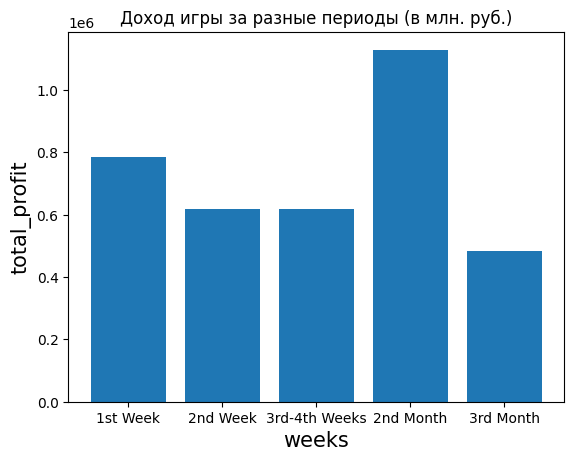

In [118]:
plt.bar(weeks, total_profit)

plt.title('Доход игры за разные периоды (в млн. руб.)')
plt.xlabel('weeks', fontsize=15)
plt.ylabel('total_profit', fontsize=15)
plt.show()

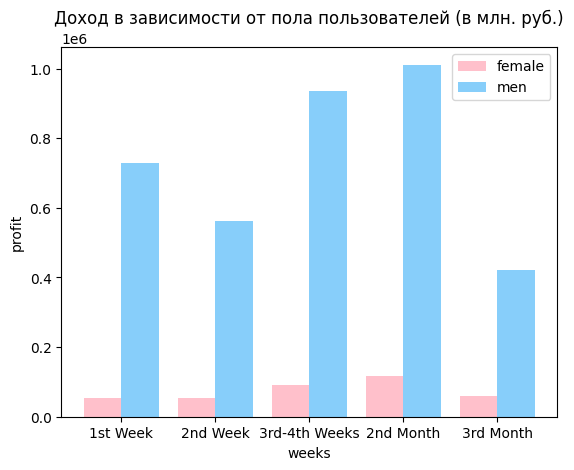

In [205]:

X_axis = np.arange(len(weeks))
  
plt.bar(X_axis - 0.2, female, 0.4, label = 'female', color = "pink")
plt.bar(X_axis + 0.2, men, 0.4, label = 'men', color = "lightskyblue")
  
plt.xticks(X_axis, weeks)
plt.xlabel("weeks")
plt.ylabel("profit")
plt.title("Доход в зависимости от пола пользователей (в млн. руб.)")
plt.legend()
plt.show()

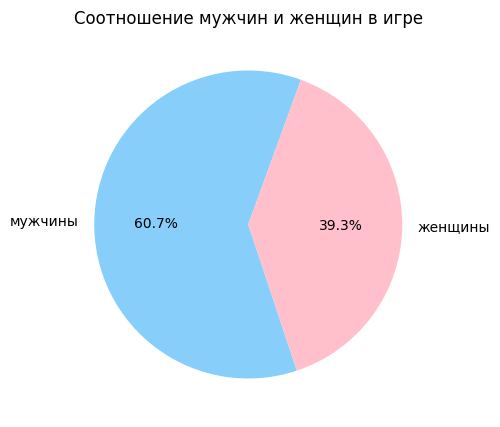

In [148]:
labels = ['мужчины', 'женщины']
sizes = [len(data[data['Пол']=='male']), len(data[data['Пол']=='female'])]

#fig, ax = plt.subplots();
#ax.pie(sizes, labels=labels);



plt.figure(figsize=(10, 5))

colors = ['lightskyblue', 'pink']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=70)
plt.title('Соотношение мужчин и женщин в игре')

plt.show()

#### Вывод:
- В игре преймщественно мужчины: 60% мужин(20362) и 40% женщин(13203). При этом мужчины тратят почти в 10 раз больше денег. 
- Первая неделя самая эффективная в плане генерирования выручки. При этом видно что пользователи теряют интерес к игре на третий месяц.  


#### Влияние возраста 

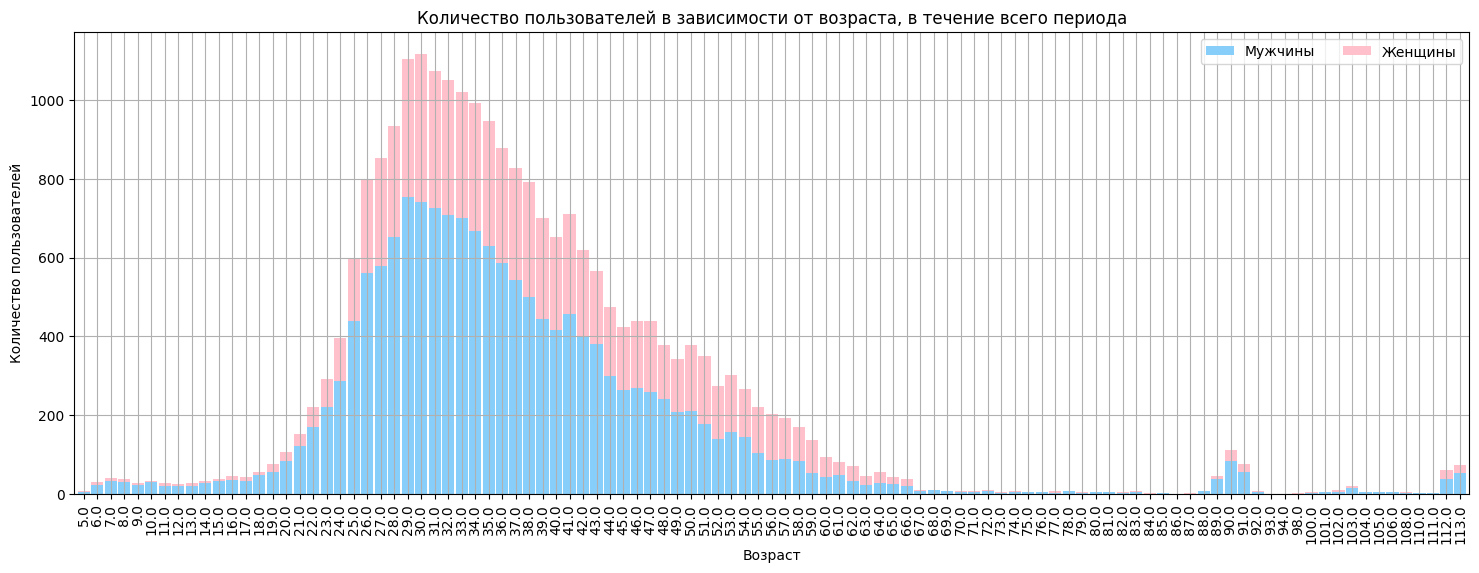

In [207]:


plt.figure(figsize=(18, 6))

bar1 = plt.Rectangle((0, 0), 1, 1, fc="lightskyblue", edgecolor='none')
bar2 = plt.Rectangle((0, 0), 1, 1, fc='pink', edgecolor='none')

data.groupby('Возраст')['Возраст'].count().plot(kind='bar', width=0.9, color="pink")
data[data['Пол'] == 'male'].groupby('Возраст')['Возраст'].count().plot(kind='bar', width=0.9, color="lightskyblue")

l = plt.legend([bar1, bar2], ['Мужчины', 'Женщины'], loc=1, ncol=2, prop={'size': 10})

plt.title('Количество пользователей в зависимости от возраста, в течение всего периода')
plt.ylabel('Количество пользователей')
plt.grid(True)

plt.show()


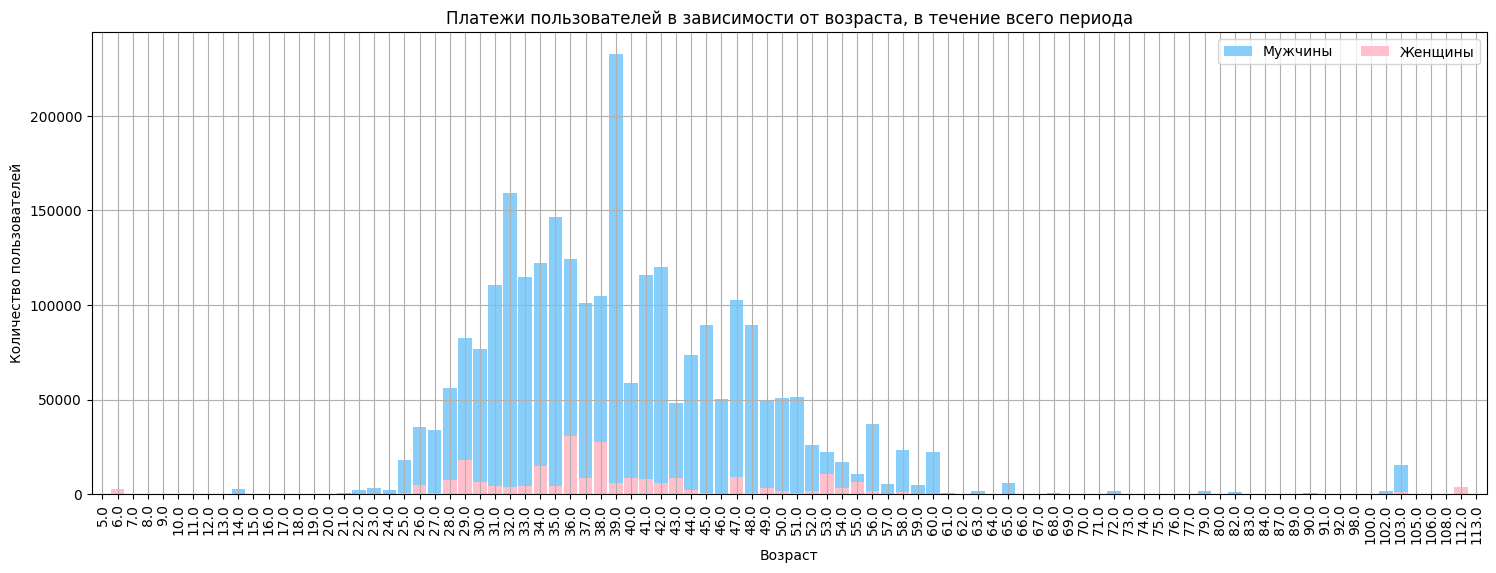

In [210]:
plt.figure(figsize=(18, 6))

bar1 = plt.Rectangle((0, 0), 1, 1, fc="lightskyblue", edgecolor='none')
bar2 = plt.Rectangle((0, 0), 1, 1, fc='pink', edgecolor='none')

data.groupby('Возраст')['Возраст'].count().plot(kind='bar', width=0.9, color="pink")
data[data['Пол'] == 'male'].groupby('Возраст')['Всего платежей (руб.)'].sum().plot(kind='bar', width=0.9, color="lightskyblue")
data[data['Пол'] == 'female'].groupby('Возраст')['Всего платежей (руб.)'].sum().plot(kind='bar', width=0.9, color="pink")

l = plt.legend([bar1, bar2], ['Мужчины', 'Женщины'], loc=1, ncol=2, prop={'size': 10})

plt.title('Платежи пользователей в зависимости от возраста, в течение всего периода')
plt.ylabel('Количество пользователей')
plt.grid(True)
#data[data['Пол'] == 'male'].groupby('Возраст')['Всего платежей (руб.)'].agg(np.sum).plot(kind='bar', width=0.9, color="lightskyblue")
plt.show()

#### Вывод: 
- Как у мужчин так и у женщин наибольшее кол-во пользователей в игре находится в промежутку 25-43 лет. 
- При этом 90% платежей приходится на 25-60 лет, из них можно выделить возрастную группу в 28-51 год, с наибольшими вложениями в  игру.

#### Влияние географии

In [230]:
# Список 10 стран с наибольши кол-ом пользователей в игре
head_countries = data.groupby("Страна")['Страна'].count().sort_values(ascending = False).head(10)
head_countries

Страна
RUSSIAN_FEDERATION    21325
UKRAINE                5555
GEORGIA                1432
ARMENIA                1220
GERMANY                 910
BELARUS                 613
KAZAKHSTAN              506
AZERBAIJAN              297
LATVIA                  246
ISRAEL                  222
Name: Страна, dtype: int64

In [223]:
# Суммарное кол-во пользователей из выше перечисленных стран 
data.groupby("Страна")['Страна'].count().sort_values(ascending = False).head(10).sum()

32326

In [224]:
# Общее кол-во пользователей зарегестрированных в игре из всех стран 
data.groupby("Страна")['Страна'].count().sort_values(ascending = False).sum()

33565

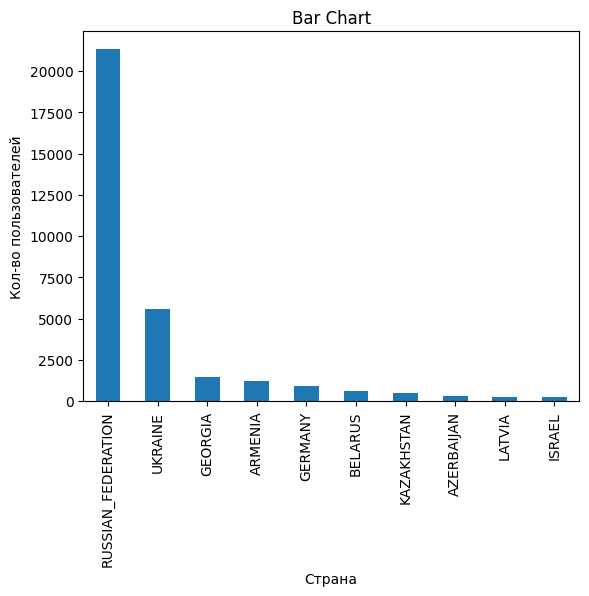

In [239]:
head_countries.plot.bar();
plt.xlabel('Страна')
plt.ylabel('Кол-во пользователей')
plt.title('Bar Chart')
plt.show();


In [247]:
# Пользователи этих стран больше всего приносят прибыли для игры
data.groupby("Страна")['Всего платежей (руб.)'].sum().sort_values(ascending = False).head(10)

Страна
RUSSIAN_FEDERATION    3540466
UKRAINE                164433
ISRAEL                 101473
GERMANY                 91996
UNITED_STATES           28003
KAZAKHSTAN              25046
BELARUS                 24454
ESTONIA                 18433
LATVIA                  18202
LITHUANIA               17140
Name: Всего платежей (руб.), dtype: int64

#### Вывод:
- 96% всех пользователей игры регестрируются из 10 основных стран. Большая часть которых страны СНГ, а так же страны с крупной русско-говорящей диаспорой 
- 63% пользователей приходится на РФ
- Пользователи из Израиля, Германии, США, Прибалтики, несмотря на то что их меньше в количественном исчислении, платят существенную долю от общего дохода игры. Т.е. средний чек пользователя зарубежных стран больше, нежели стран СНГ.

#### Рекомендации:
- Необходим сконцентрироваться на зарубежной аудитории, перевод интерфейса на англ. язык, маркетинговая кампания в зарубежных соц. сетях
- Расширить геймплей для удержания игроков, после третьего месяца